In [109]:
# ad class inbalance
#data analysis  , univariate(hist and box) and bivariate(scatter, reg)
#cross validation
# or check regularizaion
# check overfitting 
#foward feature selecting and backward feature selecting

In [110]:
#pip install imblearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


In [2]:
pd.options.display.max_columns= None
#pd.options.display.max_rows=None
pd.set_option('display.float_format', lambda x:'%.6f' % x)


In [3]:
df_term_deposit=pd.read_csv(r'C:\Users\SHUBHAM SHARMA\Desktop\SVM PROJECT\Predicting Term Deposit Subscription by a client\Dataset\bank-additional-full.csv',sep=';')

In [4]:
df_term_deposit.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no


In [5]:
df_term_deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df_term_deposit.shape

(41188, 21)

In [7]:
print('total number of people:{}'.format(df_term_deposit.shape[0]))
print('number of people opted for term deposit: {}'.format(df_term_deposit[df_term_deposit.y=='yes'].shape[0]))
print('number of people not opted for term deposit: {}'.format(df_term_deposit[df_term_deposit.y=='no'].shape[0]))
# use class inbalance in this

total number of people:41188
number of people opted for term deposit: 4640
number of people not opted for term deposit: 36548



# Class imbalance

In [8]:
x=df_term_deposit.drop('y',axis=1)
y=df_term_deposit['y']

In [9]:
#pip install imblearn

In [10]:
#     from imblearn import under_sampling ,over_sampling
#     from imblearn.over_sampling import RandomOverSampler
#     roc=RandomOverSampler(random_state=0)
#     x_resample,y_resample=ros.fit_resample(x,y)
#     print(sorted(counter(y_resample).items()),y_resample.shape)

In [11]:

# from imblearn.under_sampling import RandomUnderSampler
# roc=RandomUnderrSampler(random_state=0)
# x_resample,y_resample=ros.fit_resample(x,y)
# print(sorted(counter(y_resample).items()),y_resample.shape)

In [12]:
df_term_deposit.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
df_term_deposit.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.024060,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.421250,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [14]:
df_term_deposit.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [15]:
# label encoding
df_term_deposit['y']=df_term_deposit['y'].replace('no',0)
df_term_deposit['y']=df_term_deposit['y'].replace('yes',1)
df_term_deposit.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0


In [16]:
#.3.4 one hot encoding for categorical vairable
df_term_deposit.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [17]:
data_cat=df_term_deposit.select_dtypes(include=[np.object])
data_cat

C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_10428/1664844934.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_cat=df_term_deposit.select_dtypes(include=[np.object])


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [18]:
data_num=df_term_deposit.select_dtypes(include=[np.int])
data_float=df_term_deposit.select_dtypes(include=[np.float])
data_num

C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_10428/2765701494.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_num=df_term_deposit.select_dtypes(include=[np.int])
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_10428/2765701494.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: 

,age,duration,campaign,pdays,previous,y
0,56,261,1,999,0,0
1,57,149,1,999,0,0
2,37,226,1,999,0,0
3,40,151,1,999,0,0
4,56,307,1,999,0,0
...,...,...,...,...,...,...
41183,73,334,1,999,0,1
41184,46,383,1,999,0,0
41185,56,189,2,999,0,0
41186,44,442,1,999,0,1


In [19]:
df_num=pd.concat([data_num,data_float],axis=1)
df_num

,age,duration,campaign,pdays,previous,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,0,1.100000,93.994000,-36.400000,4.857000,5191.000000
1,57,149,1,999,0,0,1.100000,93.994000,-36.400000,4.857000,5191.000000
2,37,226,1,999,0,0,1.100000,93.994000,-36.400000,4.857000,5191.000000
3,40,151,1,999,0,0,1.100000,93.994000,-36.400000,4.857000,5191.000000
4,56,307,1,999,0,0,1.100000,93.994000,-36.400000,4.857000,5191.000000
...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,1,-1.100000,94.767000,-50.800000,1.028000,4963.600000
41184,46,383,1,999,0,0,-1.100000,94.767000,-50.800000,1.028000,4963.600000
41185,56,189,2,999,0,0,-1.100000,94.767000,-50.800000,1.028000,4963.600000
41186,44,442,1,999,0,1,-1.100000,94.767000,-50.800000,1.028000,4963.600000


In [20]:
data_cat_dummies=pd.get_dummies(data_cat,drop_first=True)

In [21]:
df=pd.concat([df_num,data_cat_dummies],axis=1)

In [22]:
df

,age,duration,campaign,pdays,previous,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,1,-1.100000,94.767000,-50.800000,1.028000,4963.600000,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41184,46,383,1,999,0,0,-1.100000,94.767000,-50.800000,1.028000,4963.600000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41185,56,189,2,999,0,0,-1.100000,94.767000,-50.800000,1.028000,4963.600000,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41186,44,442,1,999,0,1,-1.100000,94.767000,-50.800000,1.028000,4963.600000,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [23]:
# Missing Data Treatment

In [24]:
#correlation
df_num=df_num.drop('y',axis=1)
corr=df_num.corr()
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


<AxesSubplot:>

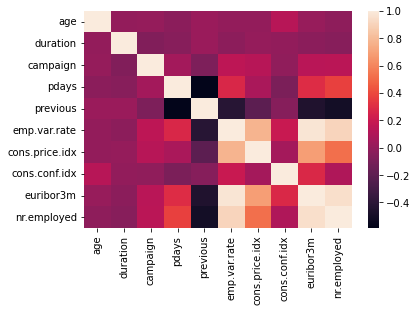

In [25]:
sns.heatmap(corr)

# data analysis  , univariate(hist and box) and bivariate(scatter, reg)

C:\Users\SHUBHAM SHARMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

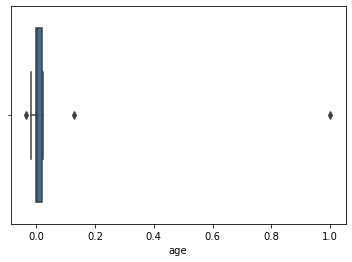

In [26]:
#1. Age
sns.boxplot(corr['age'],palette='tab10')

(array([8., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-0.03436895,  0.06906794,  0.17250484,  0.27594173,  0.37937863,
         0.48281552,  0.58625242,  0.68968931,  0.79312621,  0.8965631 ,
         1.        ]),
 <BarContainer object of 10 artists>)

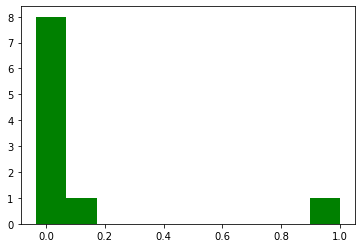

In [27]:
plt.hist(corr['age'],color='g')

(array([9., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-0.07169923,  0.0354707 ,  0.14264062,  0.24981054,  0.35698046,
         0.46415039,  0.57132031,  0.67849023,  0.78566015,  0.89283008,
         1.        ]),
 <BarContainer object of 10 artists>)

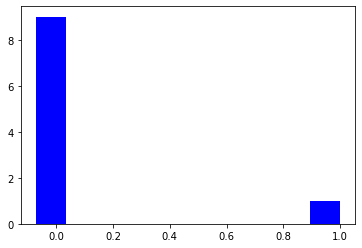

In [28]:
#2. Duration
plt.hist(corr['duration'],color='b')

(array([1., 0., 0., 3., 2., 2., 1., 0., 0., 1.]),
 array([-0.58751386, -0.42876247, -0.27001108, -0.1112597 ,  0.04749169,
         0.20624307,  0.36499446,  0.52374584,  0.68249723,  0.84124861,
         1.        ]),
 <BarContainer object of 10 artists>)

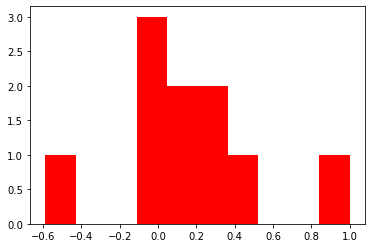

In [29]:
#3.Pdays
plt.hist(corr['pdays'],color='r')

(array([3., 1., 1., 4., 0., 0., 0., 0., 0., 1.]),
 array([-0.58751386, -0.42876247, -0.27001108, -0.1112597 ,  0.04749169,
         0.20624307,  0.36499446,  0.52374584,  0.68249723,  0.84124861,
         1.        ]),
 <BarContainer object of 10 artists>)

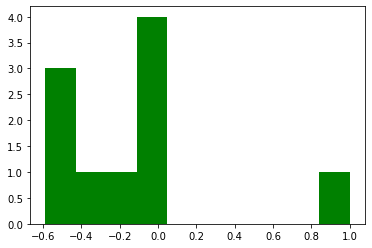

In [30]:
#4.Previous
plt.hist(corr['previous'],color='g')

BIVARIATE

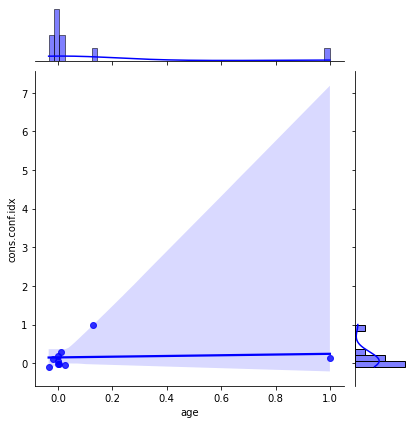

In [178]:
sns.jointplot(x='age',y='cons.conf.idx',data=corr,kind='reg',color='b')

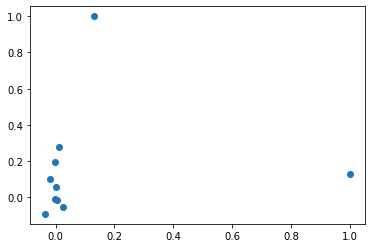

In [179]:
plt.scatter(x='age',y='cons.conf.idx',data=corr)

In [180]:
#  drop hihle correlatd features

# SVM 

In [31]:
x=df.drop('y',axis=1)
y=df['y']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=10)

In [183]:
# feature selection 



# 2. Build a Model

In [184]:
#build the model
svcclassifier=SVC(kernel='linear')
#fit the model
svcclassifier.fit(x_train,y_train)

SVC(kernel='linear')

In [185]:
#feature selection
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# sfs1 = SFS(svcclassifier, 
#            k_features=3, 
#            forward=True, 
#            floating=False, 
#            verbose=2,
#            scoring='accuracy',
#            cv=0)

# sfs1 = sfs1.fit(x, y)

# 3. Predict the values

In [187]:
y_pred=svcclassifier.predict(x_test)

# 4.Compute accuracy measure

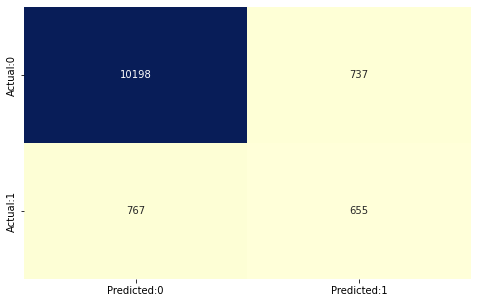

In [188]:
cm=confusion_matrix(y_test,y_pred)
# label the confusion matrix
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
# set size of the plot
plt.figure(figsize=(8,5))

# plot a heatmap
#fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlGnBu',cbar=False)
plt.show()

In [189]:
result=classification_report  (y_test,y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10935
           1       0.47      0.46      0.47      1422

    accuracy                           0.88     12357
   macro avg       0.70      0.70      0.70     12357
weighted avg       0.88      0.88      0.88     12357



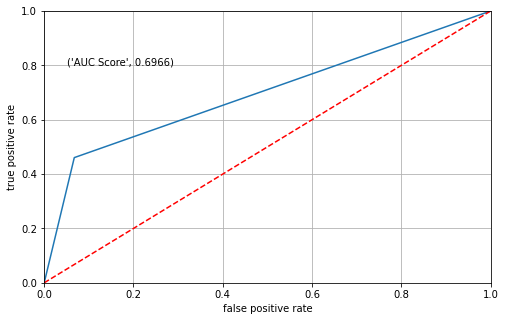

In [190]:
plt.rcParams['figure.figsize']=(8,5)
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.05,y=0.8,s=('AUC Score',round(metrics.roc_auc_score(y_test,y_pred),4)))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.grid(True)

In [191]:
from sklearn import metrics
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
svm_linear = pd.Series({'Model': "svm_linear",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(svm_linear , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,svm_linear,0.696610,0.470546,0.460619,0.878288,0.465529


Rbs kernal

In [193]:
#buld the model
svcclassifier=SVC(kernel='rbf')
#fit the model
svcclassifier.fit(x_train,y_train)

SVC()

In [194]:
y_pred=svcclassifier.predict(x_test)

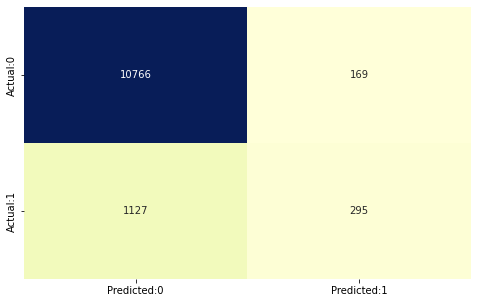

In [196]:
cm=confusion_matrix(y_test,y_pred)
# label the confusion matrix
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
# set size of the plot
plt.figure(figsize=(8,5))

# plot a heatmap
#fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlGnBu',cbar=False)
plt.show()

In [197]:
result=classification_report  (y_test,y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10935
           1       0.64      0.21      0.31      1422

    accuracy                           0.90     12357
   macro avg       0.77      0.60      0.63     12357
weighted avg       0.87      0.90      0.87     12357



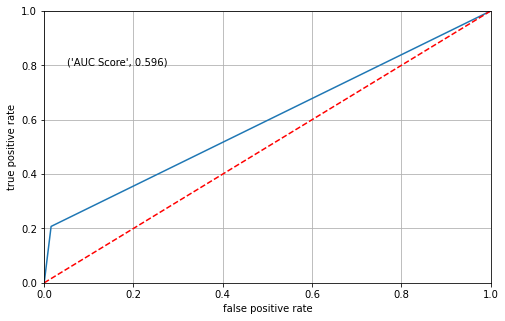

In [198]:
plt.rcParams['figure.figsize']=(8,5)
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.05,y=0.8,s=('AUC Score',round(metrics.roc_auc_score(y_test,y_pred),4)))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.grid(True)

In [199]:
from sklearn import metrics
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
svm_rbs = pd.Series({'Model': "svm_rbs",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(svm_rbs , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,svm_rbs,0.596000,0.635776,0.207454,0.895120,0.312831


sigmoid

In [200]:
#buld the model
svcclassifier=SVC(kernel='sigmoid')
#fit the model
svcclassifier.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [201]:
y_pred=svcclassifier.predict(x_test)

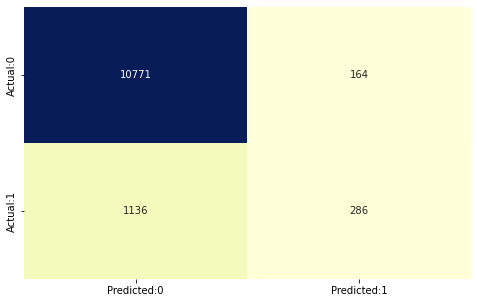

In [203]:
cm=confusion_matrix(y_test,y_pred)
# label the confusion matrix
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
# set size of the plot
plt.figure(figsize=(8,5))

# plot a heatmap
#fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlGnBu',cbar=False)
plt.show()

In [204]:
result=classification_report  (y_test,y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10935
           1       0.64      0.20      0.31      1422

    accuracy                           0.89     12357
   macro avg       0.77      0.59      0.62     12357
weighted avg       0.87      0.89      0.87     12357



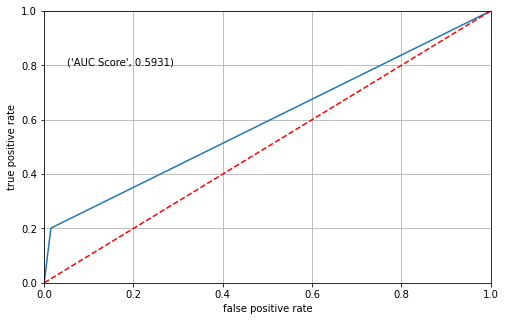

In [205]:
plt.rcParams['figure.figsize']=(8,5)
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.05,y=0.8,s=('AUC Score',round(metrics.roc_auc_score(y_test,y_pred),4)))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.grid(True)

In [206]:
from sklearn import metrics
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
svm_sigmoid = pd.Series({'Model': "svm_sigmoid",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(svm_sigmoid , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,svm_sigmoid,0.593064,0.635556,0.201125,0.894796,0.305556


Polynomial

In [35]:
#buld the model
svcclassifier=SVC(kernel='poly',degree=2,)
#fit the model
svcclassifier.fit(x_train,y_train)

SVC(degree=2, kernel='poly')

In [36]:
y_pred1=svcclassifier.predict(x_test)

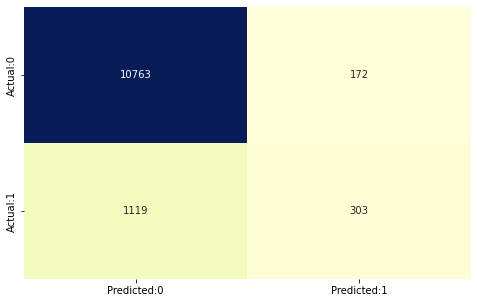

In [209]:
cm=confusion_matrix(y_test,y_pred1)
# label the confusion matrix
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
# set size of the plot
plt.figure(figsize=(8,5))

# plot a heatmap
#fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlGnBu',cbar=False)
plt.show()

In [210]:
result=classification_report  (y_test,y_pred1)
print(result)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10935
           1       0.64      0.21      0.32      1422

    accuracy                           0.90     12357
   macro avg       0.77      0.60      0.63     12357
weighted avg       0.87      0.90      0.87     12357



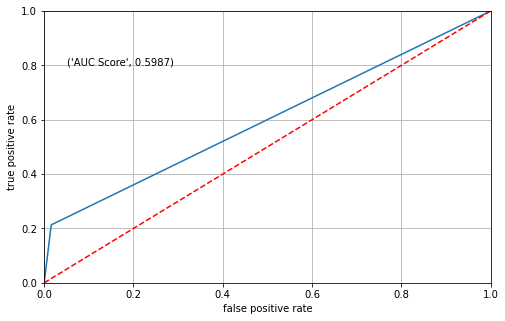

In [211]:
plt.rcParams['figure.figsize']=(8,5)
fpr,tpr,thresholds=roc_curve(y_test,y_pred1)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.05,y=0.8,s=('AUC Score',round(metrics.roc_auc_score(y_test,y_pred1),4)))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.grid(True)

In [212]:
from sklearn import metrics
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
svm_poly = pd.Series({'Model': "svm_poly",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred1),
                 'Precision Score': metrics.precision_score(y_test, y_pred1),
                 'Recall Score': metrics.recall_score(y_test, y_pred1),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred1),
                  'f1-score':metrics.f1_score(y_test, y_pred1)})



# appending our result table
result_tabulation = result_tabulation.append(svm_poly , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,svm_poly,0.598675,0.637895,0.213080,0.895525,0.319452


Precomputed

In [213]:
#buld the model
svcclassifier=SVC(kernel='poly',degree=3)
#fit the model
svcclassifier.fit(x_train,y_train)

ValueError: Precomputed matrix must be a square matrix. Input is a 28831x53 matrix.

In [ ]:
y_pred=svcclassifier.predict(x_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred1)
# label the confusion matrix
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
# set size of the plot
plt.figure(figsize=(8,5))

# plot a heatmap
#fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlGnBu',cbar=False)
plt.show()

In [ ]:
result=classification_report  (y_test,y_pred1)
print(result)

In [ ]:
plt.rcParams['figure.figsize']=(8,5)
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.05,y=0.8,s=('AUC Score',round(metrics.roc_auc_score(y_test,y_pred),4)))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.grid(True)

In [ ]:
from sklearn import metrics
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
svm_pc = pd.Series({'Model': "svm_pc",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(svm_pc , ignore_index = True)

# view the result table
result_tabulation

In [33]:
#use gridsearch cv on the model to find the best parameter

param_grid={'degree':[2,4],
           'gamma':['auto','scale'],
           'c':[.5,1]}

In [34]:
cv_rfc=GridSearchCV(estimator=svcclassifier_poly,param_grid=param_grid,scoring='accuracy',cv=5)
cv_rfc.fit(x_train,y_train)

NameError: name 'svcclassifier_poly' is not defined